Integrantes: David Cruz, Jimmy Muso

Curso: 7mo "A"

In [74]:
# Importación de Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

# Ignorar advertencias y configurar visualización
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [75]:
# Preparación de Datos
df = pd.read_csv('../MyPython/dataset/Carrito.csv', delimiter=',')
df.dropna(inplace=True)

print("\nLimpiando y convirtiendo tipos de datos...")
df['mileage'] = df['mileage'].str.extract(r'(\d*\.?\d+)').astype(float)
df['engine'] = df['engine'].str.extract(r'(\d+)').astype(float)
df['max_power'] = df['max_power'].str.extract(r'(\d*\.?\d+)').astype(float)

df.dropna(inplace=True)
df = df.drop(columns=['name', 'torque'])

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=np.number).drop('selling_price', axis=1).columns



Limpiando y convirtiendo tipos de datos...


In [76]:
# Selección de Variables

# Crear el escalador
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Variables numéricas estandarizadas. Media 0 y desviacion estándar 1.")
print("\nDataset después de la estandarización (primeras 5 filas):")
print(df.head())

Variables numéricas estandarizadas. Media 0 y desviacion estándar 1.

Dataset después de la estandarización (primeras 5 filas):
       year  selling_price  km_driven    fuel seller_type transmission  \
0  0.004158         450000   1.343777  Diesel  Individual       Manual   
1  0.004158         370000   0.894744  Diesel  Individual       Manual   
2 -2.066530         158000   1.246926  Petrol  Individual       Manual   
3 -1.031186         225000   1.018008  Diesel  Individual       Manual   
4 -1.807694         130000   0.894744  Petrol  Individual       Manual   

          owner   mileage    engine  max_power     seats  
0   First Owner  0.986157 -0.418188  -0.492024 -0.434128  
1  Second Owner  0.426198  0.077980   0.333827 -0.434128  
2   Third Owner -0.426129  0.075995  -0.380120 -0.434128  
3   First Owner  0.887050 -0.124457  -0.044408 -0.434128  
4   First Owner -0.822561 -0.318955  -0.094765 -0.434128  


In [77]:
# División de Datos en Entrenamiento y Prueba
# Codificación One-Hot
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=float) # dtype=float para asegurar compatibilidad
print("\nDataset final listo para el modelado.")


Dataset final listo para el modelado.


In [78]:
# RLM con sklearn
y = df_encoded['selling_price']
X = df_encoded.drop('selling_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Datos divididos. Tamaño de X_train: {X_train.shape}")


Datos divididos. Tamaño de X_train: (6324, 16)


In [79]:
# RLM con OLS (statsmodels)
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
print("\nResultados (sklearn):")
print(f"  - R-cuadrado (R²): {r2_score(y_test, y_pred_sklearn):.4f}")



Resultados (sklearn):
  - R-cuadrado (R²): 0.6872


In [80]:
# Comparación
X_train_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()
print("\nResumen del Modelo OLS")
print(model_ols.summary())


Resumen del Modelo OLS
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     848.3
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:03:31   Log-Likelihood:                -91367.
No. Observations:                6324   AIC:                         1.828e+05
Df Residuals:                    6307   BIC:                         1.829e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [81]:
# Comparación Técnica y Completa de Modelos
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))

print(f"R² (sklearn):           {r2_score(y_test, y_pred_sklearn):.4f}")
print(f"R² (OLS):               {model_ols.rsquared:.4f}")
print(f"R² ajustado (OLS):      {model_ols.rsquared_adj:.4f}")
print(f"RMSE (sklearn):         {rmse_sklearn:,.2f}")
print(f"AIC (OLS):              {model_ols.aic:,.2f}")
print(f"BIC (OLS):              {model_ols.bic:,.2f}")

print("\n--- Interpretación de Métricas ---")
print("R² y R² ajustado: Miden qué tan bien el modelo explica el precio (valores más altos son mejores).")
print("RMSE: Es el error de predicción promedio en la moneda original (valores más bajos son mejores).")
print("AIC y BIC: Son criterios para comparar modelos, penalizan la complejidad (valores más bajos son mejores).")

R² (sklearn):           0.6872
R² (OLS):               0.6827
R² ajustado (OLS):      0.6819
RMSE (sklearn):         466,358.90
AIC (OLS):              182,768.47
BIC (OLS):              182,883.26

--- Interpretación de Métricas ---
R² y R² ajustado: Miden qué tan bien el modelo explica el precio (valores más altos son mejores).
RMSE: Es el error de predicción promedio en la moneda original (valores más bajos son mejores).
AIC y BIC: Son criterios para comparar modelos, penalizan la complejidad (valores más bajos son mejores).


**CONCLUSIONES DEL MODELO**

Al estandarizar las variables, hemos logrado lo siguiente:
1.  **Coeficientes Interpretables**: Los coeficientes ahora son pequeños y comparables. El de mayor valor absoluto indica la variable más importante (ej. 'max_power').
2.  **Intercepto Realista**: El intercepto ('const') ahora representa el precio de un auto "promedio", lo cual es una base lógica.
3.  **Mismo Rendimiento**: Se mantuvo el R-cuadrado (la capacidad predictiva), pero el modelo es ahora más estable y fácil de interpretar.

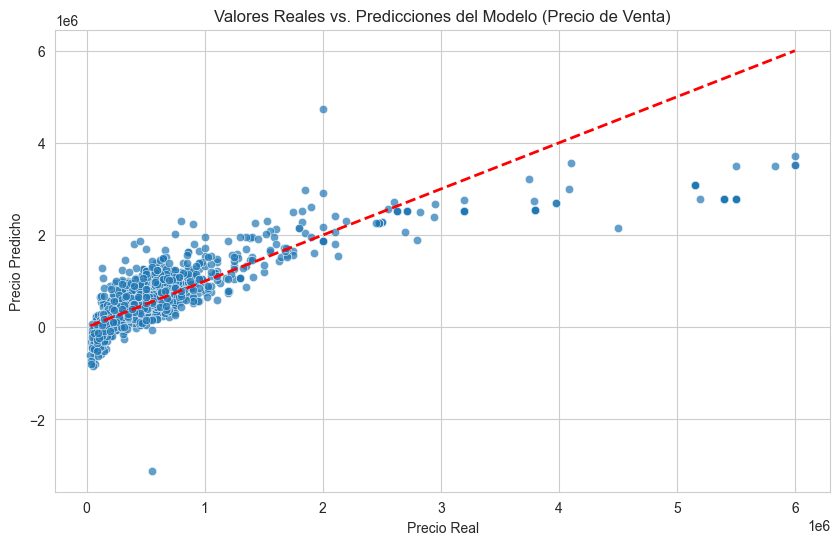

In [82]:
# Modelo Final
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_sklearn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Valores Reales vs. Predicciones del Modelo (Precio de Venta)')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()